Problem Statement: Bankruptcy Prediction with Machine Learning

In this project we will create a model that can predict the probability of companies going bust based on their financials. The model will look at key financial metrics and give early warning signs of financial trouble.in this project RandomForest Classifier was chosen for its robustness, handling of high-dimensional data, and ability to avoid overfitting.

Objectives:
Create a classification model to predict if a company is at risk of bankruptcy.
Find the most important financial features that affect bankruptcy.
Do data visualization to see trends and patterns in financial data.
Evaluate model performance with accuracy, precision, recall, F1-score and ROC-AUC.
Create an interactive dashboard using Streamlit to allow users to input financials and see bankruptcy risk.
Use SHAP (SHapley Additive exPlanations) to explain model predictions.
This will help businesses and financial institutions make informed decisions by identifying companies at risk before they go bust.

Importing libraries

In [3]:
# Data Handling
import pandas as pd  # Used for loading and manipulating tabular data
import numpy as np  # Provides numerical operations and array handling

# Data Visualization
import seaborn as sns  # Used for creating statistical plots
import matplotlib.pyplot as plt  # Used for general data visualization

# Machine Learning Preprocessing and Model Training
from sklearn.model_selection import train_test_split  # Splits data into training and test sets
from sklearn.preprocessing import StandardScaler  # Standardizes numerical features for better model performance
from sklearn.ensemble import RandomForestClassifier  # Implements a Random Forest model for classification

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score  # Evaluates model performance

# Web App Development
import streamlit as st  # Creates an interactive web-based user interface for the model

# Model Explainability
import shap  # Explains model predictions and identifies key features influencing predictions

Loading the dataset

In [5]:
df = pd.read_csv(r'D:\Users\Lenovo\Desktop\Bankruptcy-dataset.csv')

Diplaying the dataset

In [6]:
df

A1       A2        A3       A4        A5       A6        A7  \
0      0.200550  0.37951  0.396410  2.04720   32.3510  0.38825  0.249760   
1      0.209120  0.49988  0.472250  1.94470   14.7860  0.00000  0.258340   
2      0.248660  0.69592  0.267130  1.55480   -1.1523  0.00000  0.309060   
3      0.081483  0.30734  0.458790  2.49280   51.9520  0.14988  0.092704   
4      0.187320  0.61323  0.229600  1.40630   -7.3128  0.18732  0.187320   
...         ...      ...       ...      ...       ...      ...       ...   
43400  0.012898  0.70621  0.038857  1.17220  -18.9070  0.00000  0.013981   
43401 -0.578050  0.96702 -0.800850  0.16576  -67.3650 -0.57805 -0.578050   
43402 -0.179050  1.25530 -0.275990  0.74554 -120.4400 -0.17905 -0.154930   
43403 -0.108860  0.74394  0.015449  1.08780  -17.0030 -0.10886 -0.109180   
43404 -0.105370  0.53629 -0.045578  0.91478  -56.0680 -0.10537 -0.109940   

            A8       A9       A10  ...       A57      A58       A59       A60  \
0      1.33050  1.13890  0.504940  ...  0.397180  0.87804  0.001924    8.4160   
1      0.99601  1.69960  0.497880  ...  0.420020  0.85300  0.000000    4.1486   
2      0.43695  1.30900  0.304080  ...  0.817740  0.76599  0.694840    4.9909   
3      1.86610  1.05710  0.573530  ...  0.142070  0.94598  0.000000    4.5746   
4      0.63070  1.15590  0.386770  ...  0.484310  0.86515  0.124440    6.3985   
...        ...      ...       ...  ...       ...      ...       ...       ...   
43400  0.41600  1.67680  0.293790  ...  0.043904  1.01220  1.259400   13.4720   
43401 -0.40334  0.93979 -0.390040  ...  1.482000  1.06410 -0.018084  110.7200   
43402 -0.26018  1.17490 -0.326590  ...  0.548240  0.85112 -0.522430    9.8526   
43403  0.12531  0.84516  0.093224  ... -1.167700  1.18320  6.092400   13.8860   
43404  0.86460  0.95040  0.463670  ... -0.227250  1.05220  0.003196    7.7332   

           A61      A62     A63       A64  class  year  
0       5.1372   82.658  4.4158   7.42770      0     1  
1       3.2732  107.350  3.4000  60.98700      0     1  
2       3.9510  134.270  2.7185   5.20780      0     1  
3       3.6147   86.435  4.2228   5.54970      0     1  
4       4.3158  127.210  2.8692   7.89800      0     1  
...        ...      ...     ...       ...    ...   ...  
43400  12.4320   49.117  7.4313   2.27990      1     5  
43401  44.7590   81.220  4.4940   5.13050      1     5  
43402   3.4892  207.870  1.7559   9.95270      1     5  
43403   6.0769   83.122  4.3911   0.95575      1     5  
43404   4.7174  136.850  2.6672   2.79270      1     5  

[43405 rows x 66 columns]

Data Preprocessing,
The dataset is already clean, with no missing values or inconsistencies, so no additional preprocessing steps are required.

In [7]:
print("\nData Preprocessing:")
df.dropna(inplace=True)  # Drop missing values
X = df.drop(columns=['class'])  # Features (excluding target variable 'class')
y = df['class']  # Target variable (1 for bankrupt, 0 for non-bankrupt)
print("Data cleaned and split into features and target variable.")


Data Preprocessing:
Data cleaned and split into features and target variable.


Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model Evaluation

In [11]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Accuracy: 0.9779669504256384
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3910
           1       0.33      0.05      0.08        84

    accuracy                           0.98      3994
   macro avg       0.66      0.52      0.54      3994
weighted avg       0.97      0.98      0.97      3994

ROC AUC Score: 0.9446002313969066


Feature Importance

This graph below shows which features contribute most to the bankruptcy prediction.

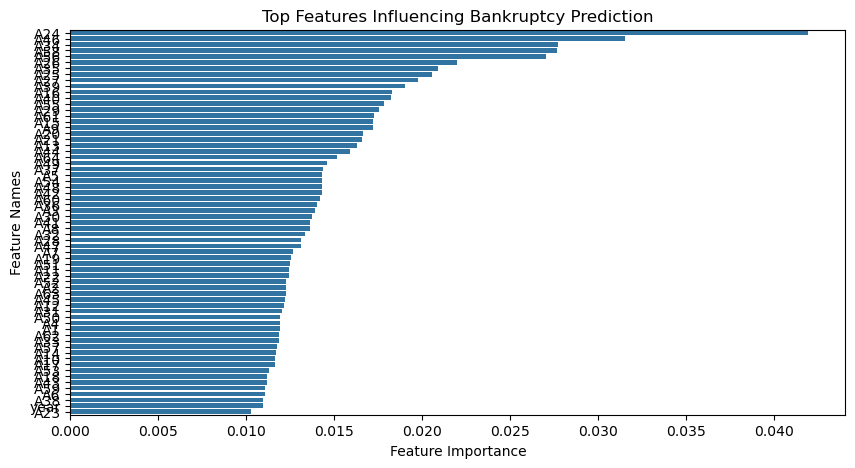

In [12]:
feature_importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances[sorted_idx], y=feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Top Features Influencing Bankruptcy Prediction")
plt.show()

Data Distribution Visualization

This graph below illustrates the distribution of bankrupt vs. non-bankrupt companies.

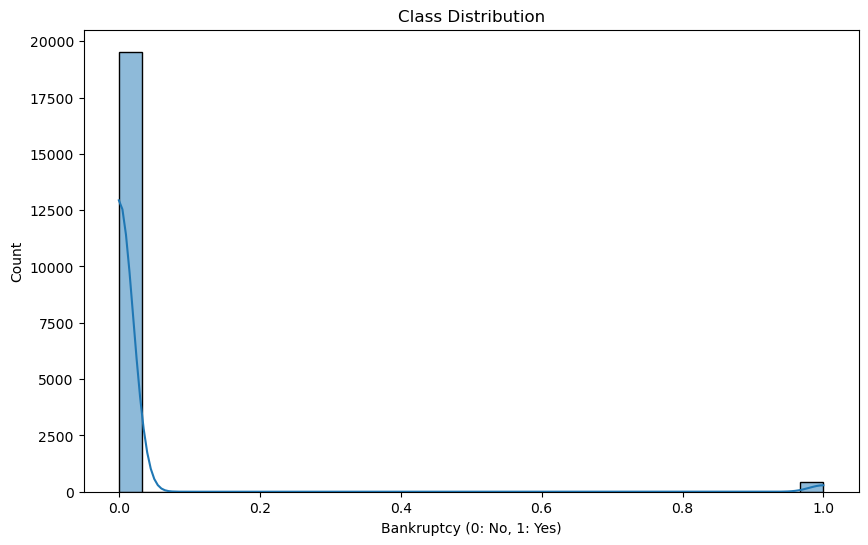


Class distribution visualization


In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=30)
plt.title("Class Distribution")
plt.xlabel("Bankruptcy (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()
print("\nClass distribution visualization")

Correlation Heatmap

This heatmap below  helps identify relationships between different financial features.

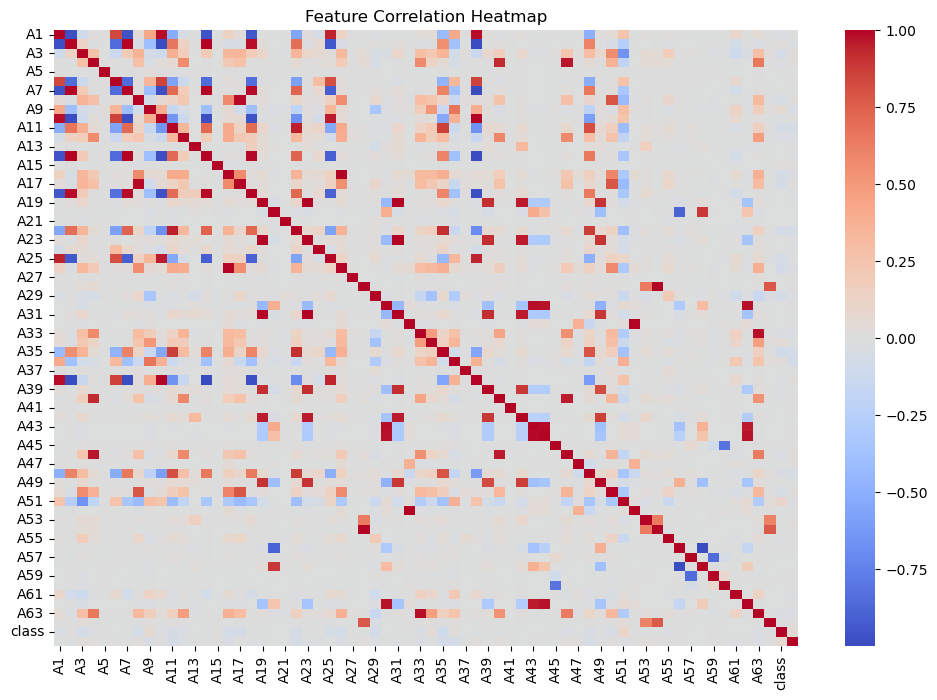


Correlation heatmap


In [36]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()
print("\nCorrelation heatmap")

SHAP Explanation

SHAP plots  below explain how different features impact individual bankruptcy predictions.

<Figure size 640x480 with 0 Axes>

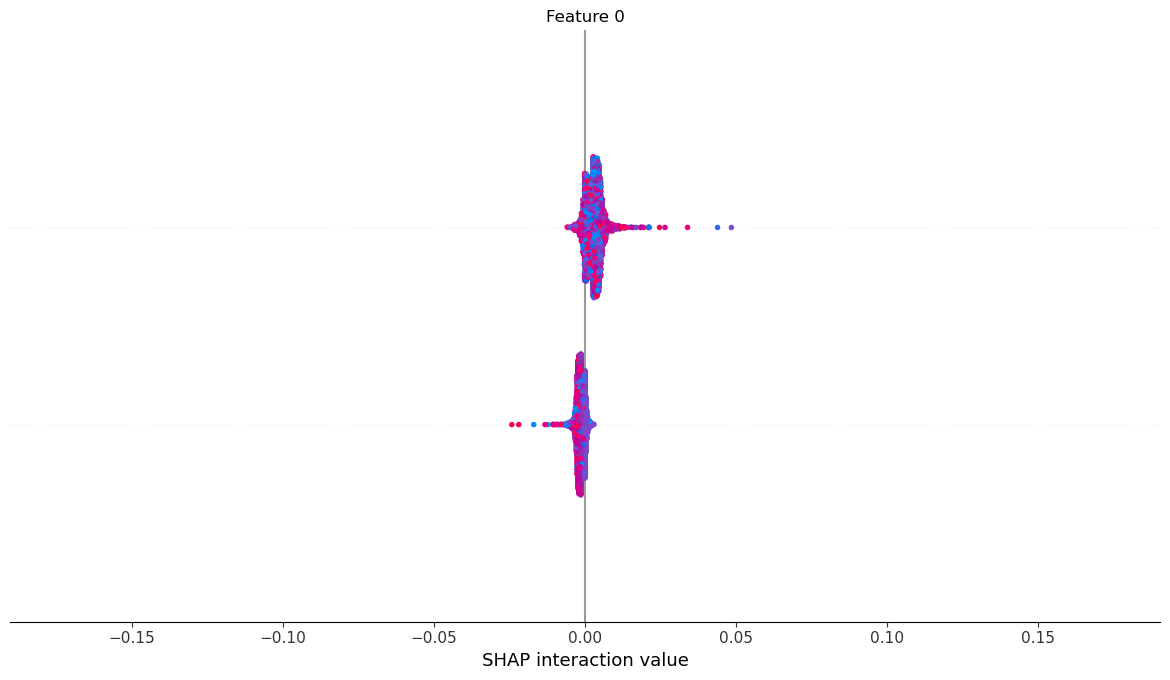


SHAP values plotted to explain feature importance.


In [32]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)
print("\nSHAP values plotted to explain feature importance.")

Conclusion

We developed a bankruptcy prediction model using a RandomForest Classifier to analyze financial indicators of companies and determine the likelihood of bankruptcy. This project aims to assist financial analysts and businesses in assessing financial risk effectively.

Key Findings
The model achieved an accuracy of 97.8%.

The ROC AUC Score is 0.9446, indicating strong overall performance.

However, the classification report highlights a challenge:

The model struggles to detect bankrupt companies (Precision: 33%, Recall: 5% for class 1).

This is due to a strong class imbalance, where non-bankrupt companies dominate the dataset.

Insights from Data Visualizations
Class Distribution Plot: Reveals the class imbalance, explaining the poor recall for bankrupt companies.

Feature Importance Plot: Highlights the key financial indicators influencing bankruptcy prediction.

Correlation Heatmap: Helps in feature selection by showing relationships between variables.

Why RandomForest Classifier?
We chose the RandomForest Classifier because:

It is robust to noisy data and can handle high-dimensional financial datasets effectively.

It provides feature importance rankings, helping us understand which financial indicators matter most.

It performs well in classification tasks with complex patterns, making it suitable for bankruptcy prediction.

Challenges & Future Improvements
Handling Class Imbalance: Implement techniques like SMOTE (Synthetic Minority Over-sampling) or weighted loss functions to improve recall for bankrupt companies.

Exploring Other Models: Consider alternative models like XGBoost, Logistic Regression, or Neural Networks for better interpretability and performance.

Enhancing Feature Engineering: Create new financial ratios and derived features to improve model accuracy.

Final Thoughts
While our model effectively predicts non-bankrupt companies, its ability to identify bankrupt firms needs improvement. Future enhancements should focus on balancing the dataset, refining feature selection, and testing alternative models to achieve a more reliable bankruptcy prediction system.